Siddhanth Kumar  
Section 102 

## Homework 5: Fitting

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary.  Please rename the notebook as SIS ID_HW05.ipynb (your student ID number) and save the notebook once you have executed it as a PDF  (note, that when saving as PDF you don't want to use the option with latex because it crashes, but rather the one to save it directly as a PDF). 

**The homework should be submitted on bCourses under the Assignments tab (both the .ipynb and .pdf files). Please label it by your student ID number (SIS ID)**

## Problem 1: Optical Pumping experiment

One of the experiments in the 111B (111-ADV) lab is the study of the optical pumping of atomic rubidium. In that experiment, we measure the resonant frequency of a Zeeman transition as a function of the applied current (local magnetic field). Consider a mock data set:
<table border="1" align="center">

<tr>
<td>Current <i>I</i> (Amps)
</td><td>0.0 </td><td> 0.2 </td><td> 0.4 </td><td> 0.6 </td><td> 0.8 </td><td> 1.0 </td><td> 1.2 </td><td> 1.4 </td><td> 1.6 </td><td> 1.8 </td><td> 2.0 </td><td> 2.2
</td></tr>
<tr>
<td>Frequency <i>f</i> (MHz)
</td><td> 0.14 </td><td> 0.60 </td><td> 1.21 </td><td> 1.74 </td><td> 2.47 </td><td> 3.07 </td><td> 3.83 </td><td> 4.16 </td><td> 4.68 </td><td> 5.60 </td><td> 6.31 </td><td> 6.78
</td></tr></table>

1. Plot a graph of the pairs of values. Assuming a linear relationship between $I$ and $f$, determine the slope and the intercept of the best-fit line using the least-squares method with equal weights, and draw the best-fit line through the data points in the graph.
1. From what s/he knows about the equipment used to measure the resonant frequency, your lab partner hastily estimates the uncertainty in the measurement of $f$ to be $\sigma(f) = 0.01$ MHz. Estimate the probability that the straight line you found is an adequate description of the observed data if it is distributed with the uncertainty guessed by your lab partner. (Hint: use scipy.stats.chi2 class to compute the quantile of the chi2 distribution).  What can you conclude from these results? 
1. Repeat the analysis assuming your partner estimated the uncertainty to be $\sigma(f) = 1$ MHz. What can you conclude from these results?
1. Assume that the best-fit line found in Part 1 is a good fit to the data. Estimate the uncertainty in measurement of $y$ from the scatter of the observed data about this line. Again, assume that all the data points have equal weight. Use this to estimate the uncertainty in both the slope and the intercept of the best-fit line. This is the technique you will use in the Optical Pumping lab to determine the uncertainties in the fit parameters.
1. Now assume that the uncertainty in each value of $f$ grows with $f$: $\sigma(f) = 0.03 + 0.03 * f$ (MHz). Determine the slope and the intercept of the best-fit line using the least-squares method with unequal weights (weighted least-squares fit)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import *
from scipy.stats import chi2
import scipy.optimize as fitter

# Use current as the x-variable in your plots/fitting
current = np.arange(0, 2.3, .2)  # Amps
frequency = np.array([.14, .6, 1.21, 1.74, 2.47, 3.07, 3.83, 4.16, 4.68, 5.6, 6.31, 6.78]) # MHz


1. The best fit with equal weights estimate for the slope is  3.072+/-0.053
1. The best fit with equal weights estimate for the intercept is 0.0038+/-0.0686


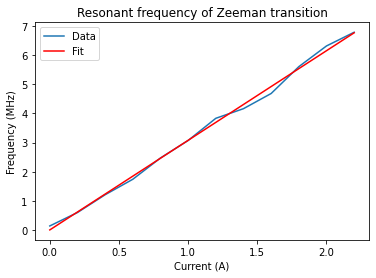

In [17]:
def linear_model(x, slope, intercept):
    '''Model function to use with curve_fit();
       it should take the form of a line'''
    calc = (slope * x) + intercept
    return calc


par, cov = fitter.curve_fit(linear_model, current, frequency)

# The best-fit value for a0 is the first element of the returned parameters
a0 = par[0]
# And the error estimate is the first diagonal element (row 0, column 0) of the covariance matrix
error_a0 = np.sqrt(cov[0,0])
print('1. The best fit with equal weights estimate for the slope is {0:6.3f}+/-{1:5.3f}'.format(a0, error_a0))


# The best-fit value for a1 is the second element of the returned parameters
a1 = par[1]
# And the error estimate is the second diagonal element (row 1, column 1) of the covariance matrix
error_a1 = np.sqrt(cov[1,1])
print('1. The best fit with equal weights estimate for the intercept is {0:.4f}+/-{1:.4f}'.format(a1, error_a1))


# Use fitter.curve_fit() to get the line of best fit
# Plot this line, along with the data points -- remember to label

plt.plot(current, frequency)
xfit = np.linspace(0,2.2,50)
plt.plot(xfit,linear_model(xfit, *par),'r-')
plt.legend(['Data', 'Fit'])
plt.xlabel('Current (A)')
plt.ylabel('Frequency (MHz)')
plt.title('Resonant frequency of Zeeman transition')
plt.show()




In [10]:
chi_squared = np.sum(((linear_model(current, *par)-frequency)/0.01)**2) 
print ('chi^2 is {0}'.format(chi_squared))

prob = 1-chi2.cdf(chi_squared, len(current)-len(par))
print('2. Probability: {0}'.format(prob))

print('\n \n')

chi_squared = np.sum(((linear_model(current, *par)-frequency)/1)**2) 
print ('chi^2 is {0}'.format(chi_squared))

prob = 1-chi2.cdf(chi_squared, len(current)-len(par))
print('3. Probability: {0}'.format(prob))

chi^2 is 1595.80069930071
2. Probability: 0.0

 

chi^2 is 0.15958006993007098
3. Probability: 0.9999999747818858


4. My error estimate is 0.1153184250709281
The corresponding uncertainty in the slope of the best fit line is 0.05281866102119263
The corresponding uncertainty in the intercept of the best fit line is 0.06859677291919392


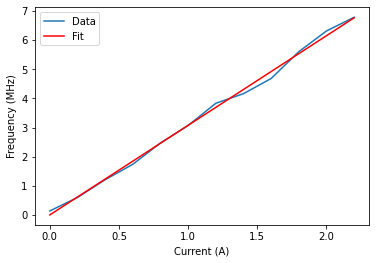

In [15]:
x_i  = linear_model(current,*par) - frequency
RMS = np.sum(1/len(x_i) * ( x_i ) **2 ) **0.5

print('4. My error estimate is {}'.format(RMS))

errorArray = np.ones(len(current)) * RMS




par, cov = fitter.curve_fit(linear_model, current, frequency, sigma=errorArray)

# The best-fit value for a0 is the first element of the returned parameters
a0 = par[0]
# And the error estimate is the first diagonal element (row 0, column 0) of the covariance matrix
error_a0 = np.sqrt(cov[0,0])
print('The corresponding uncertainty in the slope of the best fit line is {0}'.format(error_a0))


# The best-fit value for a1 is the second element of the returned parameters
a1 = par[1]
# And the error estimate is the second diagonal element (row 1, column 1) of the covariance matrix
error_a1 = np.sqrt(cov[1,1])
print('The corresponding uncertainty in the intercept of the best fit line is {0}'.format(error_a1))

chi_squared = np.sum(((linear_model(current, *par)-frequency)/0.01)**2) 
#print ('chi^2 = {0:5.4f}'.format(chi_squared))

prob = 1-chi2.cdf(chi_squared, len(current)-len(par))
#print('Probability: {0}'.format(prob))

chi_squared = np.sum(((linear_model(current, *par)-frequency)/1)**2) 
#print ('chi^2 = {0:5.4f}'.format(chi_squared))

prob = 1-chi2.cdf(chi_squared, len(current)-len(par))
#print('Probability: {0}'.format(prob))

# Use fitter.curve_fit() to get the line of best fit
# Plot this line, along with the data points -- remember to label

plt.plot(current, frequency)
xfit = np.linspace(0,2.2,50)
plt.plot(xfit,linear_model(xfit, *par),'r-')
plt.legend(['Data', 'Fit'])
plt.xlabel('Current (A)')
plt.ylabel('Frequency (MHz)')
plt.show()


5. The best fit with unequal weights estimate for the slope is 2.975704590128536+/-0.05440328118255964
5. The best fit with unequal weights estimate for the intercept is 0.08020842685419302+/-0.03268598759680482


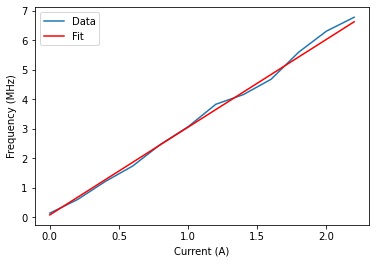

In [19]:
sigma = []

for value in frequency:
    sigma.append(0.03 + (0.03 * value))

par, cov = fitter.curve_fit(linear_model, current, frequency, sigma=sigma)

# The best-fit value for a0 is the first element of the returned parameters
a0 = par[0]
# And the error estimate is the first diagonal element (row 0, column 0) of the covariance matrix
error_a0 = np.sqrt(cov[0,0])
print('5. The best fit with unequal weights estimate for the slope is {0}+/-{1}'.format(a0, error_a0))


# The best-fit value for a1 is the second element of the returned parameters
a1 = par[1]
# And the error estimate is the second diagonal element (row 1, column 1) of the covariance matrix
error_a1 = np.sqrt(cov[1,1])
print('5. The best fit with unequal weights estimate for the intercept is {0}+/-{1}'.format(a1, error_a1))

chi_squared = np.sum(((linear_model(current, *par)-frequency)/0.01)**2) 
#print ('chi^2 = {0:5.4f}'.format(chi_squared))

prob = 1-chi2.cdf(chi_squared, len(current)-len(par))
#print('Probability: {0}'.format(prob))

chi_squared = np.sum(((linear_model(current, *par)-frequency)/1)**2) 
#print ('chi^2 = {0:5.4f}'.format(chi_squared))

prob = 1-chi2.cdf(chi_squared, len(current)-len(par))
#print('Probability: {0}'.format(prob))

# Use fitter.curve_fit() to get the line of best fit
# Plot this line, along with the data points -- remember to label

plt.plot(current, frequency)
xfit = np.linspace(0,2.2,50)
plt.plot(xfit,linear_model(xfit, *par),'r-')
plt.legend(['Data', 'Fit'])
plt.xlabel('Current (A)')
plt.ylabel('Frequency (MHz)')
plt.show()

The rest is pretty short, but the statistics might be a bit complicated.  Ask questions if you need advice or help.  Next, the problem is basically asking you to compute the $\chi^2$ for the above fit twice, once with $0.01$ as the error for each point (in the 'denominator' of the $\chi^2$ formula) and once with $1$.  

These values can then be compared to a "range of acceptable $\chi^2$ values", found with `scipy.stats.chi2.ppf()` -- which takes two inputs.  The second input should be the number of degrees of freedom used during fitting (# data points minus the 2 free parameters).  The first input should be something like $0.05$ and $0.95$ (one function call of `scipy.stats.chi2.ppf()` for each endpoint fo the acceptable range).  If the calculated $\chi^2$ statistic falls within this range, then the assumed uncertainty is reasonable.

Now, estimate the uncertainty in the frequency measurements, and use this to find the uncertainty in the best-fit parameters.  [This document](https://pages.mtu.edu/~fmorriso/cm3215/UncertaintySlopeInterceptOfLeastSquaresFit.pdf) is a good resource for learning to propagate errors in the context of linear fitting.


Finally, repeat the fitting with the weighted errors (from the $\sigma(f)$ uncertainty formula) given to `scipy.optimize.curve_fit()`